## Лабораторна робота 1

### Завдання:

1) Завантажити дані, вивести назви колонок і розмір датасета

2) Опрацювати пропуски (по можливості заповнити їх або видалити)

3) Візуалізувати дані: побудувати графік (heatmap), що відображає кореляції ознак між собою і з цільовою змінною (розміткою); побудувати гістограми розподілу ознак і boxplot-и ознак відносно цільової змінної (якщо ознак занадто багато обмежитися декількома)

4) Нормалізувати дані

5) Провести навчання наступних класифікаторів: kNN, дерево ухвалення рішень, SVM, Random Forest, AdaBoost

6) Підібрати оптимальні параметри для kNN, для SVM за допомогою GridSearch підібрати оптимальні «C» і «gamma»

7) Серед обраних оптимальних моделей кожного класу вибрати найкращу.

8) Відобразити sklearn.metrics.classification_report і sklearn.metrics.confusion_matrix

    Завантаження датасету:

In [1]:
import pandas as pd

df = pd.read_csv("usp_drug_classification.csv")     # зчитування з файла
df.head()

,usp_category,usp_class,usp_drug,kegg_id_drug,drug_example,kegg_id_drug_example,nomenclature
0,Analgesics,Nonsteroidal Anti-inflammatory Drugs,celecoxib,NaN,celecoxib,D00567,(JAN/USAN/INN)
1,Analgesics,Nonsteroidal Anti-inflammatory Drugs,diclofenac,DG00441,diclofenac,D07816,(USAN/INN)
2,Analgesics,Nonsteroidal Anti-inflammatory Drugs,diclofenac,DG00441,diclofenac potassium,D00903,(USAN)
3,Analgesics,Nonsteroidal Anti-inflammatory Drugs,diclofenac,DG00441,diclofenac sodium,D00904,(JP17/USP)
4,Analgesics,Nonsteroidal Anti-inflammatory Drugs,diclofenac,DG00441,diclofenac diethylamine,D07817,NaN


    Виведення назв колонок і розміру датасету:

In [2]:
print("Columns name:", list(df.columns))
print("Size of dataframe: ", df.shape)

Columns name: ['usp_category', 'usp_class', 'usp_drug', 'kegg_id_drug', 'drug_example', 'kegg_id_drug_example', 'nomenclature']
Size of dataframe:  (1803, 7)


    Опрацювання пропусків:

In [3]:
df.isna().sum()

usp_category              0
usp_class                 0
usp_drug                  0
kegg_id_drug            460
drug_example              0
kegg_id_drug_example      0
nomenclature            130
dtype: int64

In [4]:
df = df.dropna()

In [5]:
print("New size:", df.shape)

New size: (1238, 7)


In [6]:
df['usp_category'].unique()     # визначення унікальних класів

array(['Analgesics', 'Anesthetics',
       'Anti-Addiction/Substance Abuse Treatment Agents',
       'Antibacterials', 'Anticonvulsants', 'Antidementia Agents',
       'Antidepressants', 'Antiemetics', 'Anti-inflammatory Agents',
       'Antimigraine Agents', 'Antimyasthenic Agents',
       'Antimycobacterials', 'Antineoplastics', 'Antiparasitics',
       'Antiparkinson Agents', 'Antipsychotics', 'Antivirals',
       'Anxiolytics', 'Bipolar Agents', 'Blood Glucose Regulators',
       'Blood Products/Modifiers/Volume Expanders',
       'Cardiovascular Agents', 'Central Nervous System Agents',
       'Gastrointestinal Agents', 'Genitourinary Agents',
       'Hormonal Agents, Stimulant/Replacement/Modifying (Sex Hormones/Modifiers)',
       'Immunological Agents', 'Inflammatory Bowel Disease Agents',
       'Ophthalmic Agents', 'Respiratory Tract/Pulmonary Agents',
       'Sleep Disorder Agents',
       'Therapeutic Nutrients/Minerals/Electrolytes'], dtype=object)

In [7]:
#Лишимо лише топ-5 класів, оскільки класів дуже багато
df_small = df[df['usp_category'].isin( df.usp_category.value_counts().keys()[:5])]
df_small

,usp_category,usp_class,usp_drug,kegg_id_drug,drug_example,kegg_id_drug_example,nomenclature
1,Analgesics,Nonsteroidal Anti-inflammatory Drugs,diclofenac,DG00441,diclofenac,D07816,(USAN/INN)
2,Analgesics,Nonsteroidal Anti-inflammatory Drugs,diclofenac,DG00441,diclofenac potassium,D00903,(USAN)
3,Analgesics,Nonsteroidal Anti-inflammatory Drugs,diclofenac,DG00441,diclofenac sodium,D00904,(JP17/USP)
9,Analgesics,Nonsteroidal Anti-inflammatory Drugs,fenoprofen,DG00754,fenoprofen,D02350,(USAN/INN)
10,Analgesics,Nonsteroidal Anti-inflammatory Drugs,fenoprofen,DG00754,fenoprofen calcium,D00968,(JAN/USP)
...,...,...,...,...,...,...,...
1717,Respiratory Tract/Pulmonary Agents,Pulmonary Antihypertensives,treprostinil,DG00161,treprostinil,D06213,(JAN/USAN/INN)
1720,Respiratory Tract/Pulmonary Agents,"Respiratory Tract Agents, Other",acetylcysteine,DG01069,acetylcysteine,D00221,(JP17/USP/INN)
1725,Respiratory Tract/Pulmonary Agents,"Respiratory Tract Agents, Other",tetrahydrozoline,DG01030,tetryzoline,D08578,(INN)
1726,Respiratory Tract/Pulmonary Agents,"Respiratory Tract Agents, Other",tetrahydrozoline,DG01030,tetrahydrozoline nitrate,D00756,(JAN)


    Оскільки всі дані категоріальні (не числові), треба їх перекодувати:

In [8]:
from sklearn.preprocessing import OrdinalEncoder
pd.options.mode.chained_assignment = None

for col in df_small.columns:
    df_small.loc[:,col+"_num"] = (OrdinalEncoder().fit_transform(df_small[col].values.reshape(-1, 1))+1).astype("int")
df_small.head()

c:\Users\Win10\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,usp_category,usp_class,usp_drug,kegg_id_drug,drug_example,kegg_id_drug_example,nomenclature,usp_category_num,usp_class_num,usp_drug_num,kegg_id_drug_num,drug_example_num,kegg_id_drug_example_num,nomenclature_num
1,Analgesics,Nonsteroidal Anti-inflammatory Drugs,diclofenac,DG00441,diclofenac,D07816,(USAN/INN),1,28,63,98,143,411,16
2,Analgesics,Nonsteroidal Anti-inflammatory Drugs,diclofenac,DG00441,diclofenac potassium,D00903,(USAN),1,28,63,98,144,145,15
3,Analgesics,Nonsteroidal Anti-inflammatory Drugs,diclofenac,DG00441,diclofenac sodium,D00904,(JP17/USP),1,28,63,98,145,146,13
9,Analgesics,Nonsteroidal Anti-inflammatory Drugs,fenoprofen,DG00754,fenoprofen,D02350,(USAN/INN),1,28,85,149,206,271,16
10,Analgesics,Nonsteroidal Anti-inflammatory Drugs,fenoprofen,DG00754,fenoprofen calcium,D00968,(JAN/USP),1,28,85,149,207,161,7


    Візуалізація даних:

        heatmap:

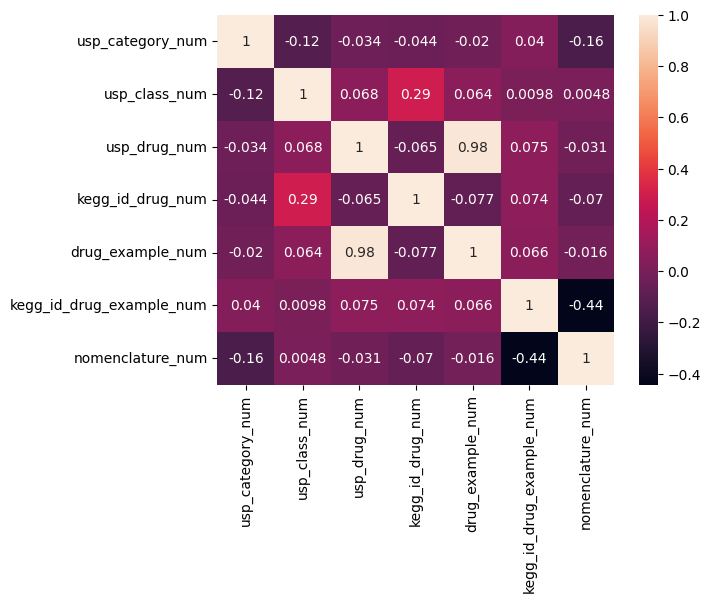

In [9]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

df_corr = df_small.corr()
heatmap = sns.heatmap(df_corr, annot = True)

        Гістограми розподілу ознак і boxplot-и ознак відносно цільової змінної:

In [10]:
df_small.columns[7:]

Index(['usp_category_num', 'usp_class_num', 'usp_drug_num', 'kegg_id_drug_num',
       'drug_example_num', 'kegg_id_drug_example_num', 'nomenclature_num'],
      dtype='object')

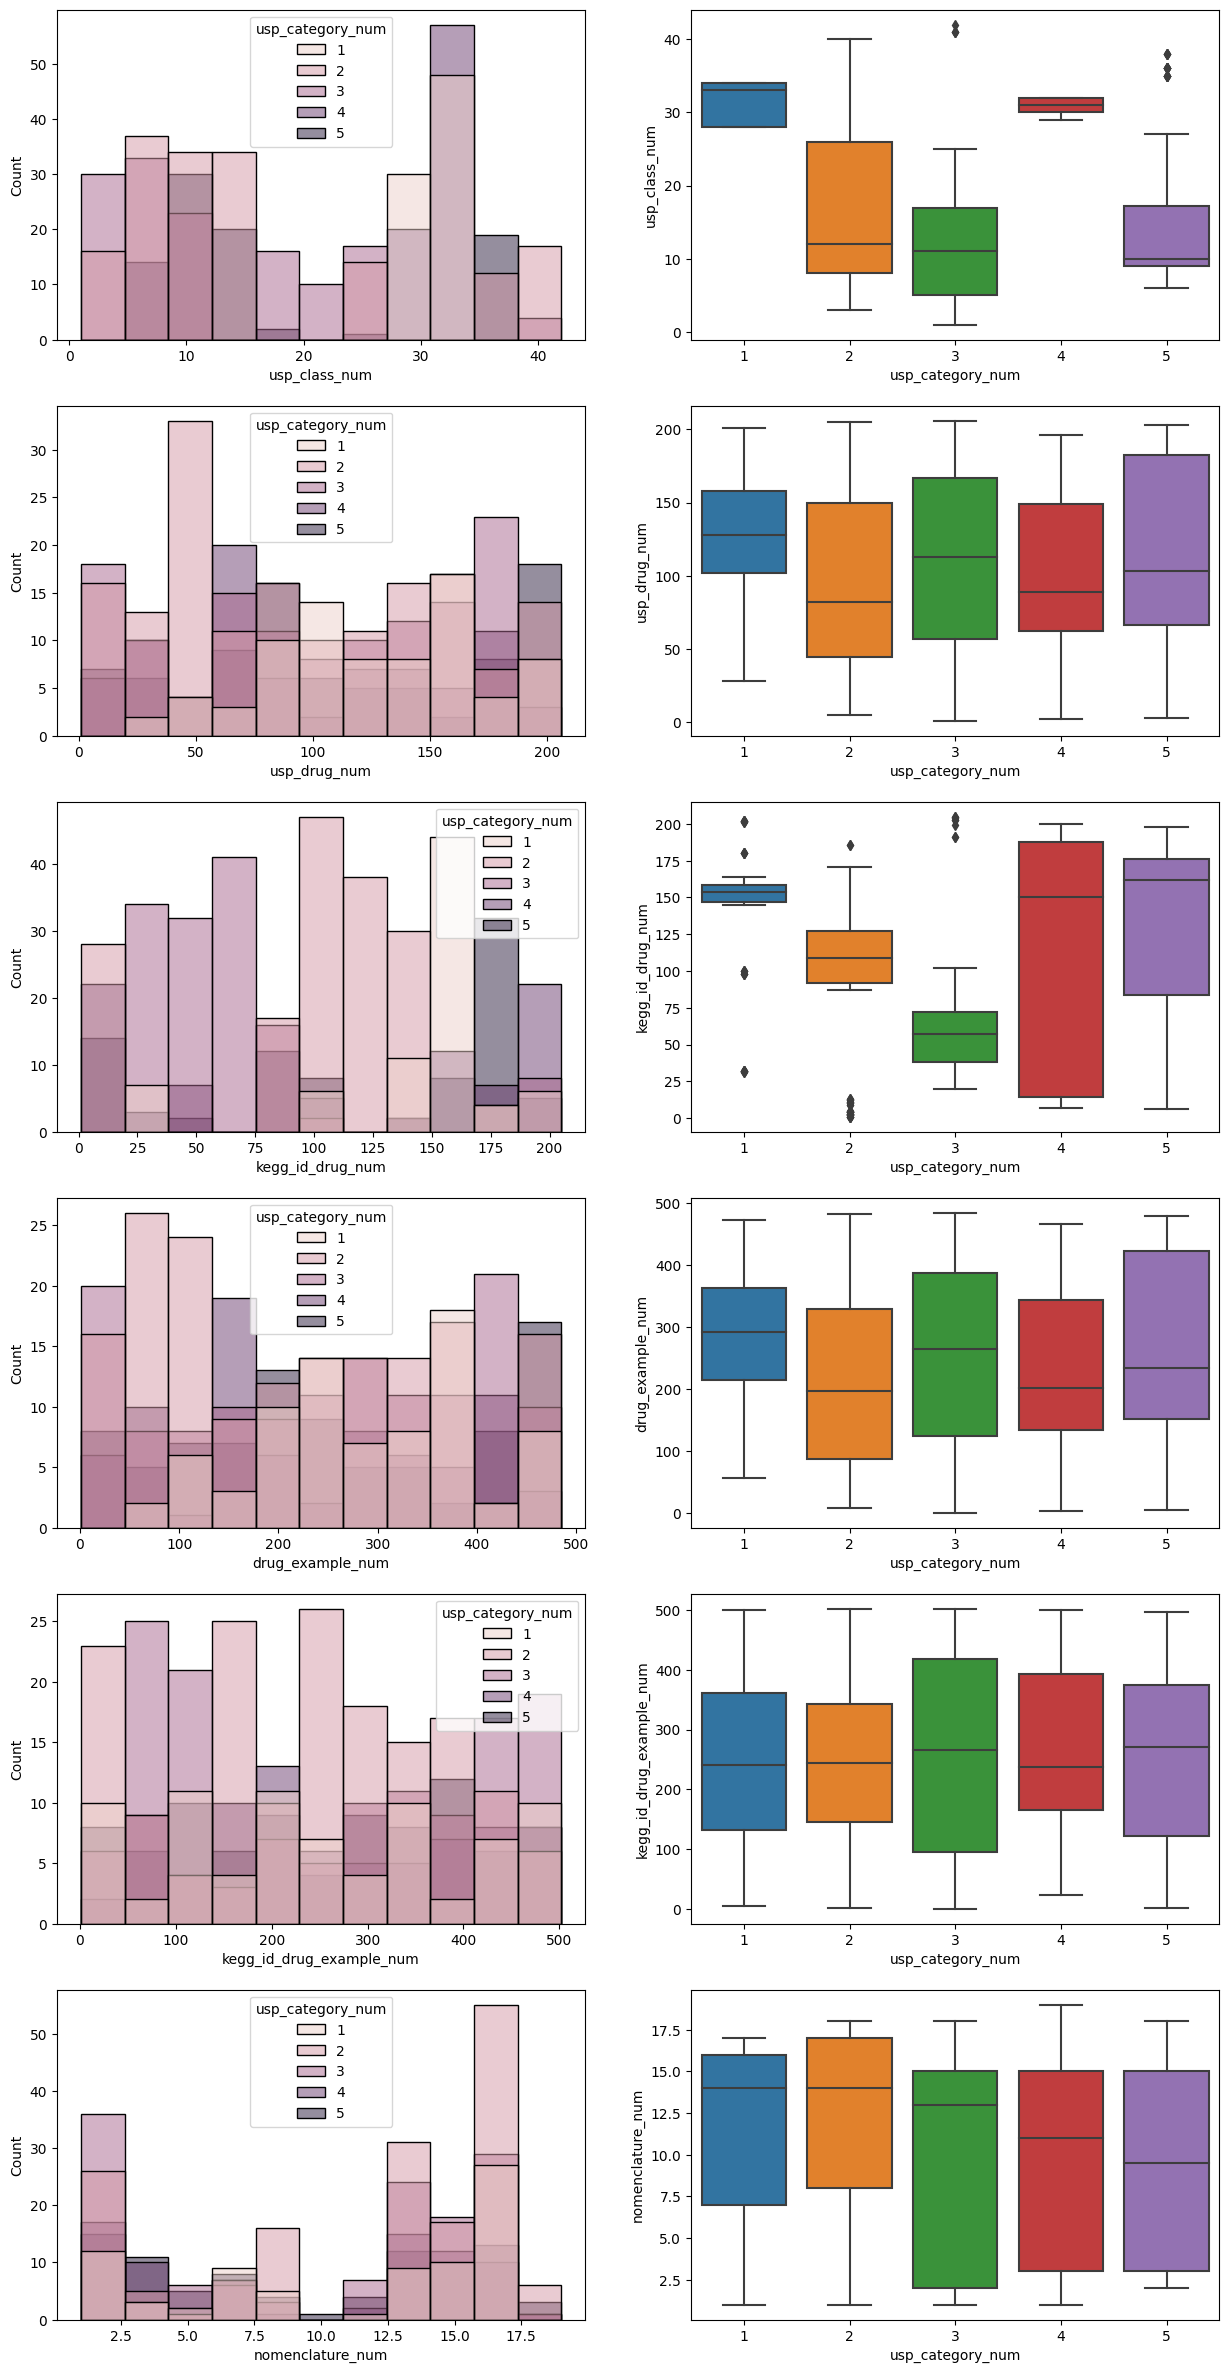

In [11]:
X = df_small[df_small.columns[8:]]
y = df_small['usp_category_num']

plt.rcParams['figure.figsize'] = [15, 30]
fig, axs = plt.subplots(6, 2)
for n in range(0, len(X.columns)):
    sns.histplot(data=df_small, x =X.columns[n],hue="usp_category_num", ax = axs[n,0])
    sns.boxplot(data=df_small, y =X.columns[n],x="usp_category_num", ax = axs[n,1])

    Нормалізація даних:

In [12]:
from sklearn import preprocessing

X = preprocessing.MinMaxScaler().fit_transform(X)

    Класифікація:

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC  
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix 

        Поділ даних:

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,stratify=y)

        Визначення оптимального k для KNN:

Text(0, 0.5, 'Accuracy')

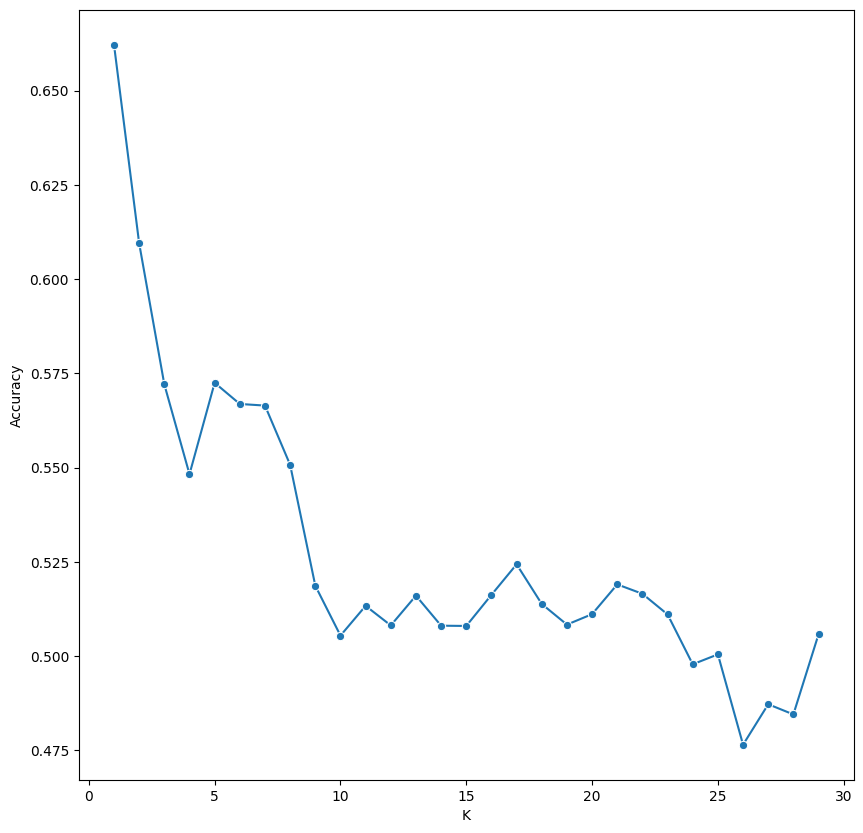

In [15]:
import numpy as np

k_values = [i for i in range (1,30)]
scores = []

for k in k_values:
    KNN_Classifier = KNeighborsClassifier(n_neighbors=k)
    scores.append(np.mean(cross_val_score(KNN_Classifier, X_train, y_train, cv=10)))
    
plt.rcParams['figure.figsize'] = [10, 10]
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K")
plt.ylabel("Accuracy")


In [16]:
scores

[0.6621621621621622,
 0.6094594594594595,
 0.5720483641536273,
 0.5482219061166429,
 0.572475106685633,
 0.5668563300142248,
 0.5664295874822189,
 0.5507112375533427,
 0.5186344238975817,
 0.5054054054054054,
 0.5133001422475106,
 0.508108108108108,
 0.5160028449502133,
 0.5080369843527739,
 0.5079658605974395,
 0.5162162162162162,
 0.5243243243243244,
 0.5137980085348506,
 0.508321479374111,
 0.5110953058321479,
 0.5189900426742533,
 0.5165007112375533,
 0.5110241820768137,
 0.4977951635846372,
 0.5004267425320057,
 0.47645803698435285,
 0.48719772403982925,
 0.48449502133712663,
 0.5057610241820768]

In [17]:
best_k = 1

        Визначення оптимальних параметрів для SVM:

In [18]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]}
grid = GridSearchCV(SVC(),param_grid,refit=True).fit(X_train,y_train)
print("SVC parameters: ", grid.best_estimator_)

SVC parameters:  SVC(C=100, gamma=1)


        Навчання класифікаторів:

In [19]:
KNN_Classifier = KNeighborsClassifier(n_neighbors=best_k).fit(X_train,y_train)
SVM_Classifier = SVC(C=100, gamma=1).fit(X_train, y_train)
DT_Classifier = DecisionTreeClassifier().fit(X_train,y_train)
RF_Classifier = RandomForestClassifier().fit(X_train,y_train)
AdaBoost_Classifier = AdaBoostClassifier().fit(X_train,y_train)

        Оцінка класифікаторів:

In [20]:
for i in [KNN_Classifier,SVM_Classifier, RF_Classifier,DT_Classifier, AdaBoost_Classifier]:
    y_pred = i.predict(X_test)
    print("\n\nClassifier: ", i, "\nReport:\n", classification_report(y_test, y_pred), "\nMatrix:\n", confusion_matrix(y_test, y_pred))



Classifier:  KNeighborsClassifier(n_neighbors=1) 
Report:
               precision    recall  f1-score   support

           1       0.69      0.75      0.72        24
           2       0.67      0.71      0.69        49
           3       0.69      0.72      0.71        40
           4       0.54      0.57      0.55        23
           5       0.61      0.42      0.50        26

    accuracy                           0.65       162
   macro avg       0.64      0.64      0.63       162
weighted avg       0.65      0.65      0.65       162
 
Matrix:
 [[18  1  3  2  0]
 [ 1 35  4  5  4]
 [ 2  6 29  1  2]
 [ 3  4  2 13  1]
 [ 2  6  4  3 11]]


Classifier:  SVC(C=100, gamma=1) 
Report:
               precision    recall  f1-score   support

           1       0.52      0.67      0.58        24
           2       0.76      0.71      0.74        49
           3       0.79      0.82      0.80        40
           4       0.64      0.70      0.67        23
           5       0.56      0.38

c:\Users\Win10\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Win10\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Win10\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

### Найкраща модель - DecisionTreeClassifier (асс 0.94-0.99)